# Task2-Unemployment Analysis with Python

In [25]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [36]:
# Load & Clean Data
df = pd.read_csv("Unemployment in India.csv")

# Convert Date column to datetime
df['Date'] = pd.to_datetime(df['Date'], dayfirst=True)

# Sort by date
df = df.sort_values('Date')

print(df.info())
print(df.head())


<class 'pandas.core.frame.DataFrame'>
Index: 754 entries, 0 to 372
Data columns (total 7 columns):
 #   Column                                   Non-Null Count  Dtype         
---  ------                                   --------------  -----         
 0   Region                                   740 non-null    object        
 1   Date                                     740 non-null    datetime64[ns]
 2   Frequency                                740 non-null    object        
 3   Estimated Unemployment Rate (%)          740 non-null    float64       
 4   Estimated Employed                       740 non-null    float64       
 5   Estimated Labour Participation Rate (%)  740 non-null    float64       
 6   Area                                     740 non-null    object        
dtypes: datetime64[ns](1), float64(3), object(3)
memory usage: 47.1+ KB
None
             Region       Date Frequency  Estimated Unemployment Rate (%)  \
0    Andhra Pradesh 2019-05-31   Monthly              

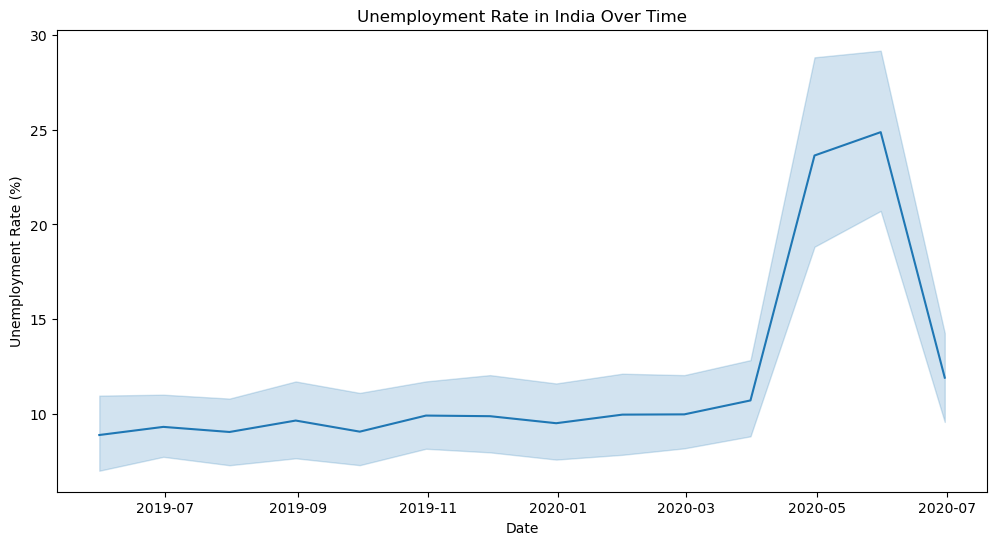

In [28]:
#Overall Unemployment Trend
plt.figure(figsize=(12,6))
sns.lineplot(x="Date", y="Estimated Unemployment Rate (%)", data=df)
plt.title("Unemployment Rate in India Over Time")
plt.ylabel("Unemployment Rate (%)")
plt.show()



Avg unemployment before Covid: 9.509533582089553
Avg unemployment after Covid: 17.77436274509804


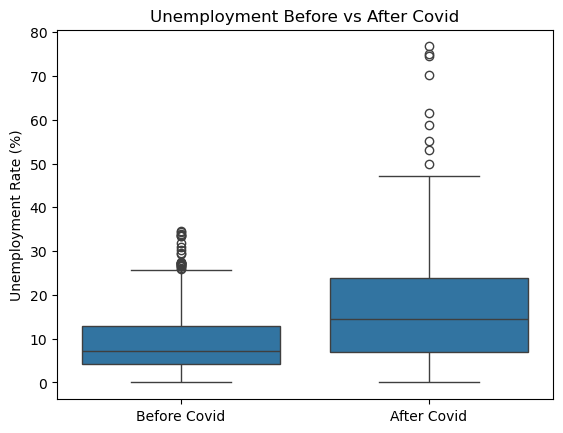

In [30]:
#Impact of Covid-19 (after March 2020)
covid_start = "2020-03-01"
before_covid = df[df['Date'] < covid_start]
after_covid  = df[df['Date'] >= covid_start]

print("Avg unemployment before Covid:", before_covid['Estimated Unemployment Rate (%)'].mean())
print("Avg unemployment after Covid:", after_covid['Estimated Unemployment Rate (%)'].mean())

sns.boxplot(x=["Before Covid"]*len(before_covid) + ["After Covid"]*len(after_covid),
            y=pd.concat([before_covid['Estimated Unemployment Rate (%)'],
                         after_covid['Estimated Unemployment Rate (%)']]))
plt.title("Unemployment Before vs After Covid")
plt.ylabel("Unemployment Rate (%)")
plt.show()


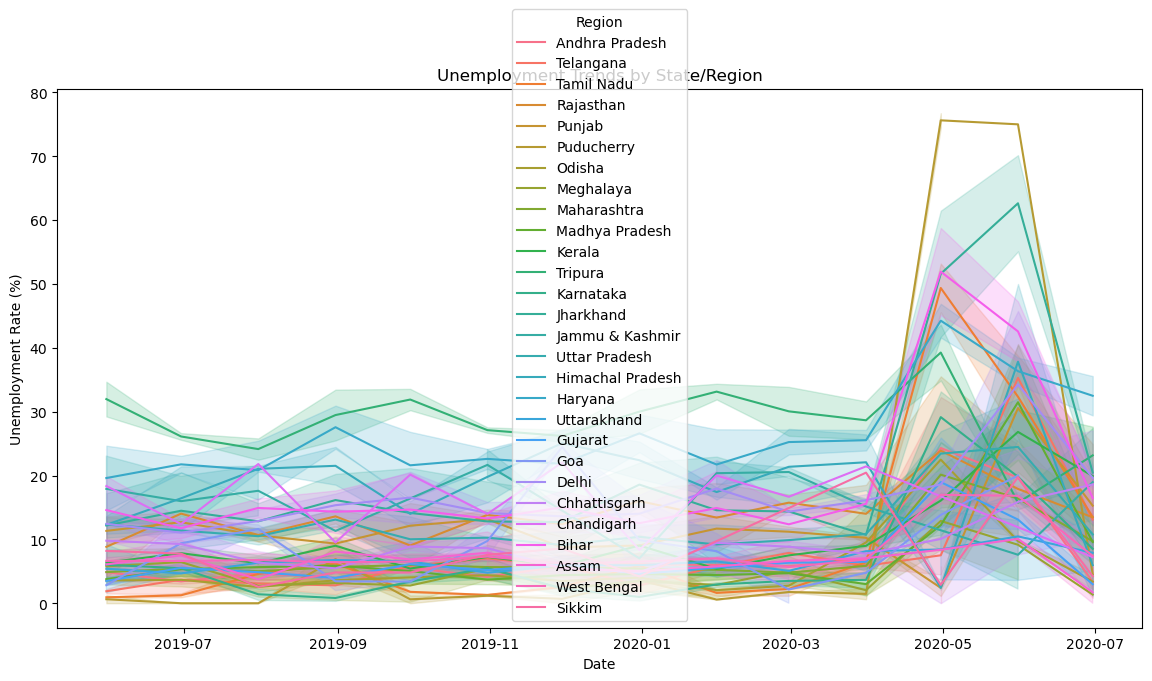

In [32]:
#Regional Analysis
plt.figure(figsize=(14,7))
sns.lineplot(x="Date", y="Estimated Unemployment Rate (%)", hue="Region", data=df)
plt.title("Unemployment Trends by State/Region")
plt.ylabel("Unemployment Rate (%)")
plt.show()


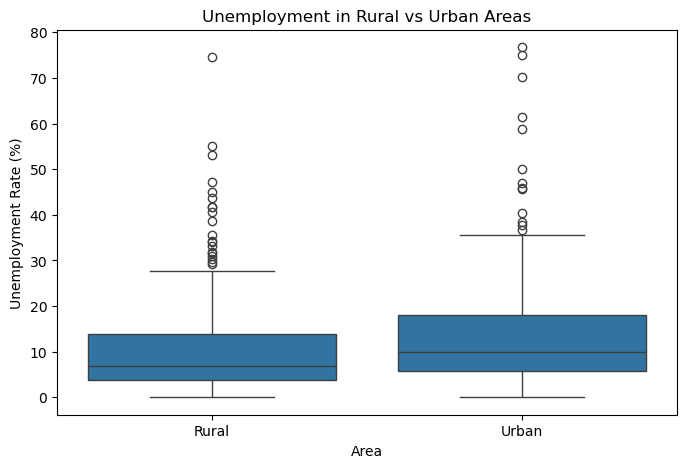

In [34]:
#Urban vs Rural
plt.figure(figsize=(8,5))
sns.boxplot(x="Area", y="Estimated Unemployment Rate (%)", data=df)
plt.title("Unemployment in Rural vs Urban Areas")
plt.ylabel("Unemployment Rate (%)")
plt.show()



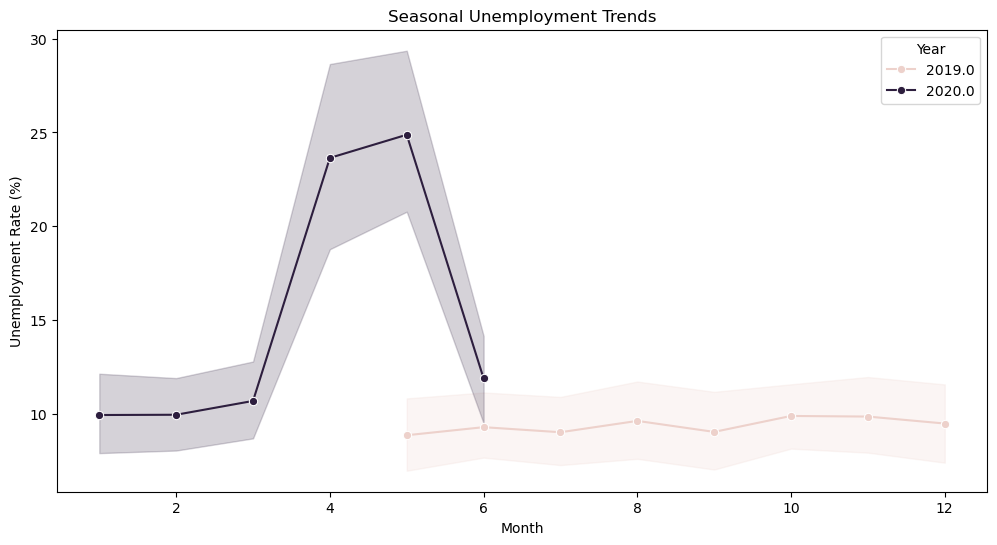

In [35]:
#Seasonal Trends
df['Year'] = df['Date'].dt.year
df['Month'] = df['Date'].dt.month

plt.figure(figsize=(12,6))
sns.lineplot(x="Month", y="Estimated Unemployment Rate (%)", hue="Year", data=df, marker="o")
plt.title("Seasonal Unemployment Trends")
plt.ylabel("Unemployment Rate (%)")
plt.show()


In [41]:
#Insights for Economic/Social Policies

# Average unemployment overall
avg_unemployment = df["Estimated Unemployment Rate (%)"].mean()
print(f"📊 Average Unemployment Rate in India: {avg_unemployment:.2f}%")

# Compare Urban vs Rural
rural_avg = df[df["Area"]=="Rural"]["Estimated Unemployment Rate (%)"].mean()
urban_avg = df[df["Area"]=="Urban"]["Estimated Unemployment Rate (%)"].mean()
print(f"🏡 Rural Avg Unemployment: {rural_avg:.2f}%")
print(f"🏙️ Urban Avg Unemployment: {urban_avg:.2f}%")

# State/Region with highest and lowest unemployment
region_avg = df.groupby("Region")["Estimated Unemployment Rate (%)"].mean().sort_values()
print(f"✅ Region with Lowest Unemployment: {region_avg.index[0]} ({region_avg.iloc[0]:.2f}%)")
print(f"⚠️ Region with Highest Unemployment: {region_avg.index[-1]} ({region_avg.iloc[-1]:.2f}%)")

# Covid-19 impact (March 2020 as cutoff)
covid_start = "2020-03-01"
before_covid = df[df['Date'] < covid_start]["Estimated Unemployment Rate (%)"].mean()
after_covid  = df[df['Date'] >= covid_start]["Estimated Unemployment Rate (%)"].mean()
print(f"🦠 Avg Unemployment Before Covid: {before_covid:.2f}%")
print(f"🦠 Avg Unemployment After Covid: {after_covid:.2f}%")


📊 Average Unemployment Rate in India: 11.79%
🏡 Rural Avg Unemployment: 10.32%
🏙️ Urban Avg Unemployment: 13.17%
✅ Region with Lowest Unemployment: Meghalaya (4.80%)
⚠️ Region with Highest Unemployment: Tripura (28.35%)
🦠 Avg Unemployment Before Covid: 9.51%
🦠 Avg Unemployment After Covid: 17.77%
